<a href="https://colab.research.google.com/github/AYUSH-11/Machine-Learning/blob/main/LHC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive  #to import Google drive data
drive.mount('/content/drive') #to the drive data into colab cloud and enter the activation colab

Mounted at /content/drive


In [3]:
cd /content/drive/"My Drive/Colab Notebooks/LHC"

/content/drive/My Drive/Colab Notebooks/LHC


In [4]:
dataset = pd.read_csv('parkinsons.csv')

In [5]:
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
dataset.shape

(195, 24)

In [7]:
dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
dataset_target = dataset['status'].values
dataset_features = dataset.drop(['name','status'], axis = 1)

In [9]:
from sklearn.model_selection import train_test_split

X_input_features = np.array(dataset_features)
Y_target_variable = np.array(dataset_target)

X_train,X_test,Y_train,Y_test = train_test_split(X_input_features,Y_target_variable,test_size=0.20,random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(X_train,Y_train)
Prediction_of_model = model_logistic_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
from sklearn import metrics

confusion_matrixx = metrics.confusion_matrix(Y_test,Prediction_of_model)

confusion_matrixx

print("Accuracy:",metrics.accuracy_score(Y_test, Prediction_of_model))

Accuracy: 0.8974358974358975


In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [13]:
scaler = StandardScaler()
scaler.fit(dataset_features)
scaled_data = scaler.transform(dataset_features)

In [14]:
test_acc =[]
for i in range(2,22):
    pca = PCA(n_components=i)
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)

    # spliting data in train and test dataset 
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x_pca , dataset_target, test_size = 0.2, random_state=50)

    # training dataset
    from sklearn.linear_model import LogisticRegression
    Log_Reg =LogisticRegression(max_iter=5000).fit(X_train,y_train)

    #print("Training  score: ",Log_Reg.score(X_train, y_train))
    #print("Test  score: ",Log_Reg.score(X_test, y_test))

    from sklearn.metrics import classification_report,confusion_matrix
    prediction=Log_Reg.predict(X_test)
    #print(classification_report(y_test,prediction))


    # Create an array (so it is easier to calculate the accuracy)
    
    cm_df=confusion_matrix(y_test,prediction)
    cm = np.array(cm_df)
    Predict_accu = (cm[0,0]+cm[1,1])/cm.sum()
    
    test_acc.append(Predict_accu)

In [15]:
print(test_acc)

[0.7948717948717948, 0.7948717948717948, 0.7692307692307693, 0.8205128205128205, 0.8205128205128205, 0.8205128205128205, 0.8205128205128205, 0.8205128205128205, 0.8205128205128205, 0.8205128205128205, 0.8205128205128205, 0.8205128205128205, 0.8205128205128205, 0.8205128205128205, 0.8205128205128205, 0.8205128205128205, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461]


No handles with labels found to put in legend.


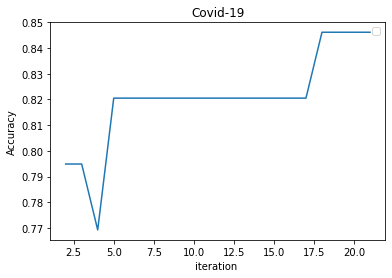

In [16]:
index = [i for i in range(2,22)]
plt.plot(index, test_acc)

plt.xlabel("iteration ")
plt.ylabel("Accuracy")
plt.title("Covid-19")
plt.legend()
plt.show()